# IRIS DATASET

# Logistic Regression from scratch

In [1]:
#importing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\naren\Desktop\DESKTOP MAMTA\STUDY BSC DATA ANALYTICS\semester 3 bsc Data Analytics\ML\IRIS.csv')
data.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#encoding the target variables (setosa: 0,versicolor: 1,viginica: 2)
keys = data['species'].unique()
values = [i for i in range(len(keys))]
mapping = dict(zip(keys,values))
data['species'] = data['species'].replace(keys,values)

In [3]:
#shuffling the data
data = data.to_numpy()
np.random.shuffle(data)

In [4]:
#splitting training and testing dataset
X = data[:,:-1]
Y = data[:,-1]
test_train_ratio = 0.2
num_testing_example = int(test_train_ratio*(X.shape[0]))
num_training_example = X.shape[0]-num_testing_example
X_train = X[:num_training_example]
Y_train = Y[:num_training_example]
X_test = X[num_training_example:]
Y_test = Y[num_training_example:]

In [5]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001

In [6]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))


In [7]:
X = np.concatenate((np.ones((len(X_train),1)), X_train), axis=1)
y = Y_train
y1 = np.zeros([X_train.shape[0], len(np.unique(y))])
for i in range(0, len(np.unique(y))):
    for j in range(0, len(y1)):
        if y[j] == np.unique(y)[i]:
            y1[j, i] = 1
        else: 
            y1[j, i] = 0


In [8]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        for j in range(0,3):
            theta = np.array(theta)
            h = hypothesis(theta[:,j], X)
            for k in range(0, theta.shape[0]):
                theta[k, j] -= (alpha/m) * np.sum((h-y[:, j])*X[:, k])
    return theta, cost

In [9]:
theta = np.zeros([X_train.shape[1], y1.shape[1]])
theta = gradient_descent(X_train, y1, theta, 0.001, 100000)
theta

(array([[ 0.56095567,  0.67911236, -2.24807512],
        [ 1.82630557, -1.56331149, -2.02771085],
        [-2.80837617,  0.41949789,  3.13243113],
        [-1.26202543, -1.34822341,  2.7816516 ]]),
 <function __main__.cost(X, y, theta)>)

In [10]:
output = []
for i in range(0,3):
    h = hypothesis(theta[0][:,i], X_test)
    output.append(h)

In [11]:
y = Y_test
y2 = np.zeros([X_test.shape[0], len(np.unique(y))])
for i in range(0, len(np.unique(y))):
    for j in range(0, len(y2)):
        if y[j] == np.unique(y)[i]:
            y2[j, i] = 1
        else: 
            y2[j, i] = 0
accuracy = 0
y_pred = []
for col in range(0,3):
    for row in range(len(y2)):
        if y2[row, col] == 1 and output[col][row] >= 0.5:
            accuracy += 1
accuracy = accuracy/len(X_test)
accuracy

0.7666666666666667

In [12]:
def y_change(y, cl):
    y_pr=[]
    for i in range(0, len(y)):
        if y[i] == cl:
            y_pr.append(1)
        else:
            y_pr.append(0)
    return y_pr
y_pred =[0]*len(y)
y_uniq = np.unique(Y_test)
for i in range(0, len(y_uniq)):
    y_tr = y_change(y, y_uniq[i])
    for k in range(0, len(y)):
        if y_tr[k] == 1 and output[i][k] >= 0.5:
            y_pred[k] = int(y_uniq[i])

In [13]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 

In [14]:
F1_score(Y_test,y_pred)

'f1_score = 0.3636363636363636, recall = 0.2222222222222222, precision = 1.0'

In [38]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)

Text(0.5, 48.29999999999998, 'Predicted label')

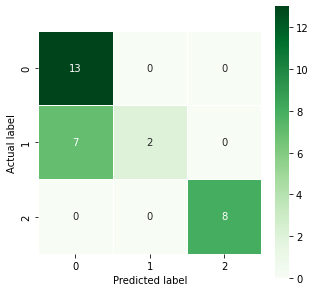

In [39]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# Implementing logistic regression from sklearn

In [40]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred,Y_test))

1.0


In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm 

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  8]], dtype=int64)

Text(0.5, 48.29999999999998, 'Predicted label')

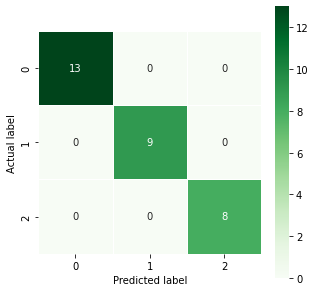

In [42]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# MNIST DATASET

# Logistic Regression from scratch

In [43]:
from sklearn.datasets import fetch_openml
import numpy as np
mnist = fetch_openml('mnist_784', version=1)
test_data, test_target = (mnist["data"][60000:]).to_numpy(int),(mnist["target"][60000:]).to_numpy(int)
train_data,train_target = (mnist['data'][:60000]).to_numpy(int),(mnist['target'][:60000]).to_numpy(int)

In [44]:
def hypothesis(theta, X):
    return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001

In [45]:
def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return -(1/len(X)) * np.sum(y*np.log(y1) + (1-y)*np.log(1-y1))

In [46]:
y = train_target
y1 = np.zeros([train_data.shape[0], len(np.unique(y))])
for i in range(0, len(np.unique(y))):
    for j in range(0, len(y1)):
        if y[j] == np.unique(y)[i]:
            y1[j, i] = 1
        else: 
            y1[j, i] = 0

In [47]:
def gradient_descent(X, y, theta, alpha, epochs):
    m = len(X)
    for i in range(0, epochs):
        for j in range(0,10):
            theta = np.array(theta)
            h = hypothesis(theta[:,j], X)
            for k in range(0, theta.shape[0]):
                theta[k, j] -= (alpha/m) * np.sum((h-y[:, j])*X[:, k])
    return theta, cost

In [ ]:
theta = np.zeros([train_data.shape[1], y1.shape[1]])
theta = gradient_descent(train_data, y1, theta, 0.001, 10000)
theta

C:\Users\naren\AppData\Local\Temp/ipykernel_11704/2241797263.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-(np.dot(theta, X.T)))) - 0.0000001


In [ ]:
output = []
for i in range(0,10):
    h = hypothesis(theta[0][:,i], test_data)
    output.append(h)

In [ ]:
y = test_target
y2 = np.zeros([test_data.shape[0], len(np.unique(y))])
for i in range(0, len(np.unique(y))):
    for j in range(0, len(y2)):
        if y[j] == np.unique(y)[i]:
            y2[j, i] = 1
        else: 
            y2[j, i] = 0
accuracy = 0
for col in range(0,3):
    for row in range(len(y2)):
        if y2[row, col] == 1 and output[col][row] >= 0.5:
            accuracy += 1
accuracy = accuracy/len(X_test)
accuracy

In [ ]:
def y_change(y, cl):
    y_pr=[]
    for i in range(0, len(y)):
        if y[i] == cl:
            y_pr.append(1)
        else:
            y_pr.append(0)
    return y_pr
y_pred =[0]*len(y)
y_uniq = np.unique(Y_test)
for i in range(0, len(y_uniq)):
    y_tr = y_change(y, y_uniq[i])
    for k in range(0, len(y)):
        if y_tr[k] == 1 and output[i][k] >= 0.5:
            y_pred[k] = int(y_uniq[i])

In [ ]:
def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1:
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0:
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1:
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0:
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f"f1_score = {f1_score}, recall = {recall}, precision = {precision}" 

In [ ]:
F1_score(test_target,y_pred)

In [ ]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# Implementing logistic regression from sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
regr = LogisticRegression()
regr.fit(X_train,Y_train)
Y_pred = regr.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_pred,Y_test)) 

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
cm

In [ ]:
import seaborn as sns
plt.figure(figsize = (5,5))
sns.heatmap(cm,annot = True,linewidths = 0.5,square = True,cmap = 'Greens')
plt.ylabel("Actual label")
plt.xlabel("Predicted label")